### HISC-Lasso: Calcul du score RED pour $m=50$ et MCAcc

In [ ]:
# install pyhsic lasso
!pip install pyHSICLasso

In [ ]:
import numpy as np
import pandas as pd
from pyHSICLasso import HSICLasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# red score
def res_score(features_index, X):
  features_values = X[:, features_index]
  correlation_matrix = np.corrcoef(features_values, rowvar=False)
  m_val = len(features_index)
  red = np.sum(np.abs(np.triu(correlation_matrix, k=1)))
  return 2 * (red / (m_val * (m_val - 1)))

In [ ]:
# data process
X = pd.read_csv("ar10p.csv")
n, p = X.shape
p -= 1
Y = X.iloc[:, p].values
X = X.iloc[:, :p].values

#standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
rep = 50
features_index = np.arange(10, 51, 10)
top_m = features_index[-1]
MCAcc = np.zeros((len(features_index), rep))
RED_table50 = np.zeros((1, rep))

In [ ]:
for i in range(rep):
  print(i)
  np.random.seed(i*n*p)  # Ensure different seeds
  x_index = np.random.choice(n, size=int(n * 0.8), replace=False)
  X_train, Y_train = X[x_index], Y[x_index]
  X_test, Y_test = np.delete(X, x_index, axis=0), np.delete(Y, x_index)

  # Sélection de variables avec HSIC Lasso
  hsic_lasso = HSICLasso()
  hsic_lasso.input(X_train, Y_train,kernelX="Gaussian",kernelY="Delta")

  hsic_lasso.classification(num_feat=top_m)
  ModelFeatureIndex = hsic_lasso.get_index()

  for m_index, nb_features in enumerate(features_index):
    x_features = ModelFeatureIndex[:nb_features]
    # Modèle de classification
    kernel = RBF()
    model = GaussianProcessClassifier(kernel=kernel,multi_class="one_vs_one")
    model.fit(X_train[:, x_features], Y_train)

    # Prédiction et évaluation
    y_pred = model.predict(X_test[:, x_features])
    MCAcc[m_index, i] = accuracy_score(Y_test, y_pred)

    # Calcul de la redondance
    if nb_features == top_m:
      RED_table50[0, i] = res_score(x_features, X_train)

0
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


1
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


2
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


3
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


4
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


5
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


6
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


7
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


8
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


9
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


10
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


11
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


12
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


13
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


14
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


15
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


16
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


17
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


18
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


19
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


20
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


21
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


22
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


23
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


24
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


25
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


26
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


27
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


28
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


29
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


30
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


31
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


32
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


33
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


34
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


35
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


36
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


37
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


38
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


39
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


40
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


41
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


42
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


43
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


44
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


45
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


46
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


47
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


48
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


49
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/usr/local/lib/python3.11/dist-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 104. Number of blocks 5.2 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


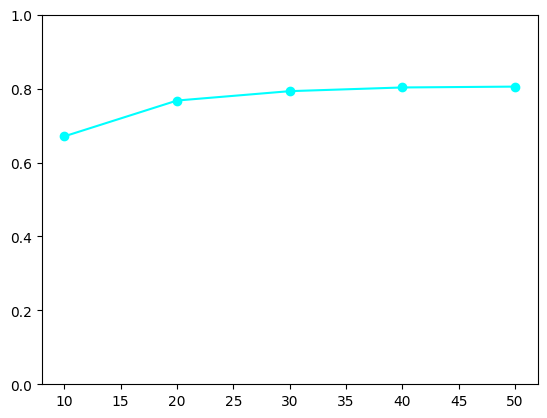

In [ ]:
# Résultats statistiques
rmean = MCAcc.mean(axis=1)
mean_acc = MCAcc[4, :].mean()
std_acc = MCAcc[4, :].std()
mean_red = RED_table50.mean()
std_red = RED_table50.std()

plt.plot(features_index, rmean, color='cyan', linestyle='-', marker='o')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Sauvegarde des résultats
np.savetxt("ar10p_hsic_mca.csv", MCAcc, delimiter=",")
np.savetxt("ar10p_hsic_red50.csv", RED_table50, delimiter=",")